<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Libraries" data-toc-modified-id="Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Data-load" data-toc-modified-id="Data-load-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data load</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Data-investigation-and-feature-selection" data-toc-modified-id="Data-investigation-and-feature-selection-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Data investigation and feature selection</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Categorical-data-analysis" data-toc-modified-id="Categorical-data-analysis-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Categorical data analysis</a></span><ul class="toc-item"><li><span><a href="#Main-insights-from-categorical-features" data-toc-modified-id="Main-insights-from-categorical-features-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>Main insights from categorical features</a></span></li></ul></li><li><span><a href="#Numerical-data-analysis" data-toc-modified-id="Numerical-data-analysis-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Numerical data analysis</a></span></li><li><span><a href="#Feature-selection-by-years" data-toc-modified-id="Feature-selection-by-years-5.6"><span class="toc-item-num">5.6&nbsp;&nbsp;</span>Feature selection by years</a></span></li></ul></li><li><span><a href="#Exporting-clean-dataset" data-toc-modified-id="Exporting-clean-dataset-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Exporting clean dataset</a></span></li></ul></div>

# Introduction

**Project - Customer Churn Prediction with Machine Learning** 

**Data** - we will be using data of the subscription business. We have the entry-level data of the customers, one row per customer, data was collected during 3 years in one country.

**Problem** - it’s cheaper to retain a customer than to acquire a new one but it’s too time-consuming and too expensive to focus on each individual customer. 

**Solution** - by predicting in advance which customers will be leaving after the first month (and what are the features that influence them to do so), you could reduce customer retention efforts by focusing on segmented customers and investing more to the features that make the difference. 

# Libraries

In [1]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (10, 10)

In [3]:
pd.set_option('display.max_columns', None)

# Functions

In [4]:
def plot_distribution_num(col):
    """
    The function takes Series and returns the kdeplot.
    """
    sns.set_style("ticks")
    s = sns.FacetGrid(data, hue="churned_1_month", aspect=2.5, palette={1: "Lightblue", 0: "Gold"})
    s.map(sns.kdeplot, col, shade=True, alpha=0.8)
    s.set(xlim=(0, data[col].max()))
    s.add_legend()
    s.set_axis_labels(col, 'proportion')
    s.fig.suptitle(col)
    plt.show()

# Data load

Due to confidentiality reasons data was previously encrypted. Here is the list of the changes that were done:

**Values changed**

- Values in the numerical columns 'days_from_first_click', 'registration_payment', 'age' and 'box_satisfaction' were changed to not enclose real business data. 
- The email domain was extracted from the email address and values were changed.
- The values of the provinces and master_channel were changed.
- The values of sex were encoded using the Label Encoder.


**New columns created**

- Target column 'churned_1_month': churned customer, in our case, is a customer that has received only one box and is canceled.
- A column with the coupon name was replaced with the column 'with_promotion' - to give the information if the customer entered with a promotion or not (the actual coupon name is not enclosed).
- Column 'lead channel' was replaced with the column 'is_lead' - giving us the information if the customer entered being the lead (in our case the lead is a customer who has left his/hers email address before subscribing (via a landing page, homepage pop-ups or other action)).
- Column 'reg_year' was created extracting the year from the registration date.
- Column 'reg_month' was created extracting the month from the registration date, values were changed.

**Loading raw encrypted data**

In [5]:
data = pd.read_csv('../data/raw_encrypted.csv', sep=',', index_col=0)

# Exploratory Data Analysis

## Data investigation and feature selection

We will start by investigating the data we have.

In [6]:
data.head()

,province,sex,master_channel,newsletter,registration_payment,use_pickup_point,churned_1_month,email_domain,with_promotion,is_lead,reg_year,days_from_first_click,age,box_satisfaction,reg_month
0,p2,0,a,1.0,10.99,0.0,1,gc,1,1,2017,0.0,25.0,152.34,a
1,p2,0,f,1.0,10.99,0.0,1,gc,1,1,2017,0.0,26.5,152.34,a
2,p16,1,f,1.0,10.99,0.0,1,gc,1,0,2017,0.0,11.0,152.34,a
3,p3,1,d,1.0,10.99,0.0,1,gc,1,0,2017,0.0,13.5,152.34,a
4,p4,1,d,1.0,10.99,0.0,0,gc,1,1,2017,0.0,18.0,152.34,a


In [7]:
data.shape

(26799, 15)

We have a total of 26799 entries and 15 columns/features. There is one entry per customer, meaning that we have data of 26799 customers.

Let's check the data types and see if we need to do any changes.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26799 entries, 0 to 26865
Data columns (total 15 columns):
province                 26799 non-null object
sex                      26799 non-null int64
master_channel           26799 non-null object
newsletter               26799 non-null float64
registration_payment     26799 non-null float64
use_pickup_point         26799 non-null float64
churned_1_month          26799 non-null int64
email_domain             26799 non-null object
with_promotion           26799 non-null int64
is_lead                  26799 non-null int64
reg_year                 26799 non-null int64
days_from_first_click    26799 non-null float64
age                      26799 non-null float64
box_satisfaction         26799 non-null float64
reg_month                26799 non-null object
dtypes: float64(6), int64(5), object(4)
memory usage: 3.3+ MB


A lot of categorical features are set as numeric data type (integer or float). It's not correct because even if they have numerical values, they are actually representing different categories (for example sex, reg_year, etc.). 

**Here is a breakdown of the categorical and numerical columns in our dataset:**
- **Categorical (a total of 11 features)**: province, sex, master_channel, newsletter, use_pickup_point, churned_1_month, email_domain, with_promotion, is_lead, reg_year, reg_month. 
- **Numerical (a total of 4 features)**: registration_payment, days_from_first_click, age, box_satisfaction.

To start with, let's correct the data types of the categorical features:

In [9]:
to_category = ['province', 'sex', 'master_channel', 'newsletter', 'use_pickup_point', 'churned_1_month',
               'email_domain', 'with_promotion', 'is_lead', 'reg_year', 'reg_month']

for col in to_category:
    data[col] = data[col].astype('category')

Let's see if our transformation worked correctly:

In [10]:
data.dtypes

province                 category
sex                      category
master_channel           category
newsletter               category
registration_payment      float64
use_pickup_point         category
churned_1_month          category
email_domain             category
with_promotion           category
is_lead                  category
reg_year                 category
days_from_first_click     float64
age                       float64
box_satisfaction          float64
reg_month                category
dtype: object

We will now describe each feature to understand if there is any possible impact on our target (churn after the first month).

- `churned_1_month` - our target feature, indicating if a customer has canceled his/hers subscription after the first month.  
- `province` - the region of the customer.
- `sex`- the sex of the customer.
- `master_channel` - the purchase channel assigned to the customer (last-click attribution).
- `newsletter` - information if the customer subscribed to the newsletter.
- `registration_payment` - the entry price, price the customers paid for their first subscription (first purchase).
- `use_pickup_point` - information if the customer decided to use the pick-up point instead of home delivery.
- `email_domain` - email domain of the customer.
- `with_promotion` - information if the customer subscribed (maid a purchase) with a promotion or not.
- `is_lead` - information if the customer was a lead before (lead for the company is an email address, in this case, it would mean that the customer has left his/hers email address before purchasing (could be done via a landing page, pop-up, etc.)
- `reg_year` - the year of the purchase.
- `reg_month` - the month of the purchase.
- `days_from_first_click` - the number of days between the first entry to the website to purchase.
- `age` - age of the customer (at the moment of the purchase).
- `box_satisfaction` - the number indicating the average satisfaction of the box of the month the customer subscribed to. The higher the value, the higher the satisfaction.

We can see that there might be an impact on the churn after the first month of all the features listed above. We will use the registration year to split our data to train and test sets and after that, we will delete it. We will not use it to predict the churn because our goal is to predict the future, meaning that the year will never be the same as in the historical data. 

## Feature engineering

**We will create three new features: random column, population per region, and average income per region.** 

A good technique for evaluating the performance of the model is to generate a random values feature. If a feature has less importance than this random feature, it's a sign of its poor significance to our data.

In [11]:
# Random column

rand = [random.randint(1, 1000) for i in range(len(data))]
data['random'] = rand

We will be creating a numerical feature to represent the value (income) per region.

In [12]:
# Loading an external file with the information about income per region

income_region = pd.read_csv('../data/income_region.csv', sep=',')
income_region.head()

,region,income
0,p1,11589
1,p9,15882
2,p11,14903
3,p15,15356
4,p14,14584


In [13]:
# Creating a new feature in our dataset with the income per region

prov_column = pd.DataFrame(data['province'])
prov_with_income = prov_column.merge(income_region.set_index(['region']), 
                                     left_on=['province'], 
                                     right_index=True, 
                                     how='left')

data['income_per_region'] = prov_with_income['income']

We will create another numerical feature to represent the population per region.

In [14]:
# Loading an external file with the population per region

population_per_region = pd.read_csv('../data/population_region.csv', sep=',')
population_per_region.head()

,province,population
0,p1,8414240
1,p9,1319291
2,p11,1022800
3,p15,1149460
4,p14,581078


In [15]:
# Creating a new feature in our dataset with the population per region

prov_column = pd.DataFrame(data['province'])
prov_with_population = prov_column.merge(population_per_region.set_index(['province']), 
                                         left_on=['province'], 
                                         right_index=True, 
                                         how='left')

data['population_per_region'] = prov_with_population['population']

In [16]:
data.head()

,province,sex,master_channel,newsletter,registration_payment,use_pickup_point,churned_1_month,email_domain,with_promotion,is_lead,reg_year,days_from_first_click,age,box_satisfaction,reg_month,random,income_per_region,population_per_region
0,p2,0,a,1.0,10.99,0.0,1,gc,1,1,2017,0.0,25.0,152.34,a,907,18707,6663394
1,p2,0,f,1.0,10.99,0.0,1,gc,1,1,2017,0.0,26.5,152.34,a,288,18707,6663394
2,p16,1,f,1.0,10.99,0.0,1,gc,1,0,2017,0.0,11.0,152.34,a,75,15251,316798
3,p3,1,d,1.0,10.99,0.0,1,gc,1,0,2017,0.0,13.5,152.34,a,990,17102,7675217
4,p4,1,d,1.0,10.99,0.0,0,gc,1,1,2017,0.0,18.0,152.34,a,830,13148,5003769


Having two numerical representations we can now delete our original region feature:

In [17]:
data.drop('province', axis=1, inplace=True)

## Missing Values

Before digging any deeper, let's see if we have any missing values and if we need to do any imputation:

In [18]:
data.isnull().sum()

sex                      0
master_channel           0
newsletter               0
registration_payment     0
use_pickup_point         0
churned_1_month          0
email_domain             0
with_promotion           0
is_lead                  0
reg_year                 0
days_from_first_click    0
age                      0
box_satisfaction         0
reg_month                0
random                   0
income_per_region        0
population_per_region    0
dtype: int64

We can see that we don't have any missing values, no data imputation will be needed.

## Categorical data analysis

Now that we have our data clean and we understand each feature, let's dig deeper and see what separation our categorical features have in comparison to the target. In other words, let's see if we can extract any information and formulate our first hypothesis to understand what is making customers churn after the first month and if we have any significant indicators from the entry data. 

We will also be able to see if we need to do any additional data transformation (grouping, filtering, etc.)

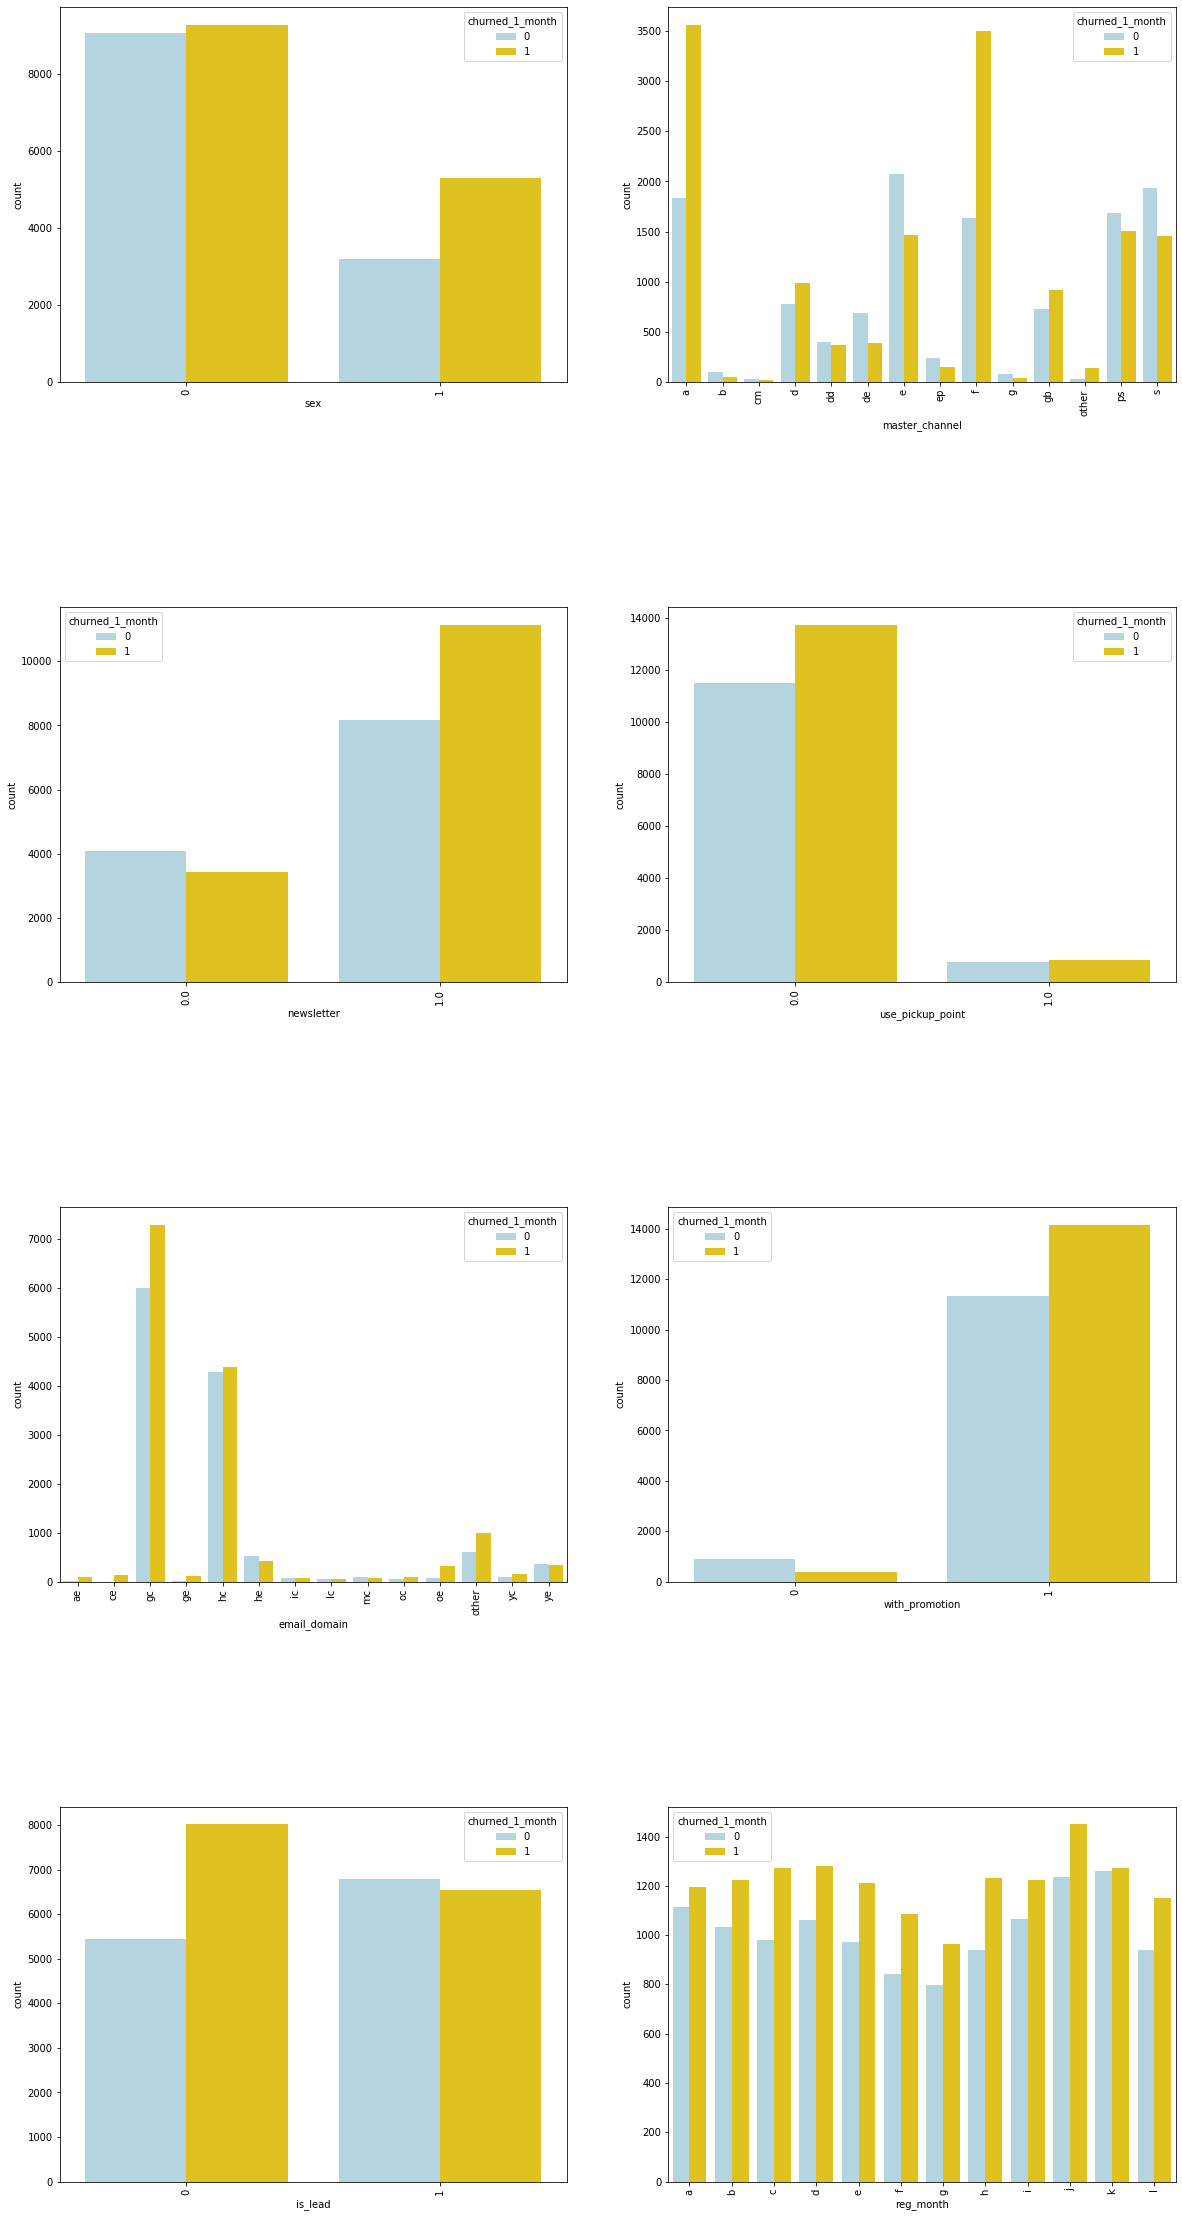

In [19]:
# Histograms of categorical features

cat_cols = data.select_dtypes('category').drop(['reg_year', 'churned_1_month'], axis=1)
                   
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20,40))
fig.subplots_adjust(hspace=0.6)
for ax, col in zip(axes.flatten(), cat_cols):
        sns.countplot(data=data, x=col, hue='churned_1_month', ax=ax, 
                      palette={1: "Gold", 0: "Lightblue"})
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

**Churned after the 1st month**

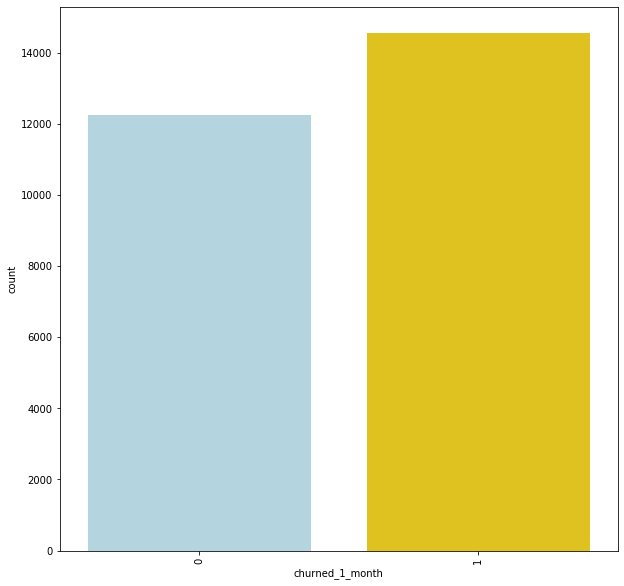

In [20]:
ax = sns.countplot(data=data, x='churned_1_month', palette={1: "Gold", 0: "Lightblue"})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

That's our target feature. We can see that there is a small disbalance between the two groups, we have more customers that are churning. Let's see the percentage for this:

In [42]:
churned_percent = data.churned_1_month.value_counts(normalize=True)*100
print(churned_percent)

1    54.437825
0    45.562175
Name: churned_1_month, dtype: float64


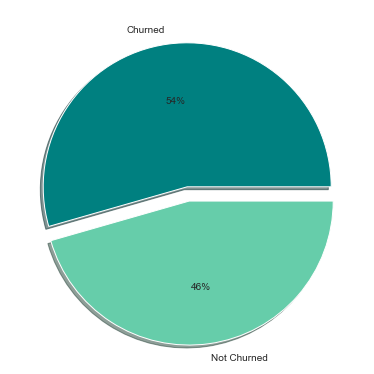

In [53]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['Churned', 'Not Churned']
rate = [churned_percent.values[0], churned_percent.values[1]]
colors = ['teal', 'mediumaquamarine']
explode = (0, 0.1) 
ax.pie(rate, labels=labels, autopct='%1.0f%%', shadow=True, explode=explode, colors=colors)
plt.show()

We have 54% of customers churning after the first month and 46% staying longer than one month. That's not a big difference, we will see if we will need to apply any balancing method before passing data to the machine learning models.

**Sex**

We can see that we have a significant difference between the two classes. We have a lot lower number of gender '1' and also it tends to churn more after the first month compared to the other class.

**Master Channel**

We can see two channels that have a much higher number of churned customers comapred to the rest (channels 'a' and 'f'). It could be that a different marketing strategy is being used to acquire new customers through these channels that is making customers churn a lot more compared to the rest. 

The company should keep an eye on these channels and maybe adjust their strategy, unless the risk is being calculated and other metrics (such as maybe a low cost) is still keeping these channels profitable. 

In comparison to these 2 channels, channel 'e' has much higher retention compared to the rest. The company should investigate what is being done with this channel and if some actions could be replicated to improve the retention from other channels.

In [24]:
data.master_channel.unique()

[a, f, d, ps, gb, ..., b, ep, other, dd, cm]
Length: 14
Categories (14, object): [a, f, d, ps, ..., ep, other, dd, cm]

We have quite a lot of channels, 14 unique. We could investigate if it would make sense to group smaller channels to one, to not have a huge amount of features (once encoded). This will depend on other features (if we have more features with high dimensionality).

**Newsletter**

We have a lot more customers that are subscribed to receive newsletters, which is great news for the Marketing team :) But we can see that those that don't subscribe to the newsletter tend to cancel less. It could be a signal that the email marketing strategy is too abusing and making customers cancel, rather than keeping them engaged. 

**Use pick up point** 

We can see that the majority of the customers are choosing to receive their box home. Those that choose the pick-up point seem to be quite stable and don't vary much between churned and not churned. Maybe it would be interesting to increase the number of customers choosing the pick-up point (if other metrics, especially the overall logistic satisfaction, are also similar to home delivery). 

Let's see if this trend is similar through all the years or pick up point was less popular (or not available) during some specific period:

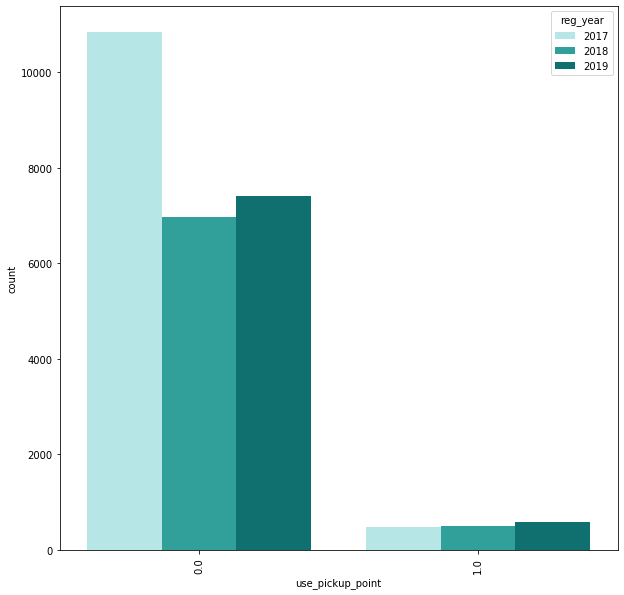

In [25]:
ax = sns.countplot(data=data, x='use_pickup_point', hue='reg_year', 
                   palette={2017: "Paleturquoise", 2018: "Lightseagreen", 2019: "Teal"})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

We can see that the pick-up point was never the most popular choice and the majority of the customer get their box delivered home.  

**Email domain**

We can see that the leading email domain is 'gc'. It seems that it has more customers canceling, let's compare it to the overall churn separation:

In [26]:
data_gc = data.loc[data.email_domain == 'gc']
round(data_gc.churned_1_month.value_counts(normalize=True)*100, 2)

1    54.87
0    45.13
Name: churned_1_month, dtype: float64

We can see that it's almost exactly the same. Our all data churn separation between the two categories is 54% vs 46%, and here as well, we have 54% vs 46%. 

The second leading email domain is 'hc' and we can see that it has almost the same number of customers staying and leaving, meaning that overall customers are staying longer coming from this email domain compared to the rest. 

**With Promotion**

We can see that almost all customers have signed up for their first box with a promotion. Let's see what's the percentage of the customers who used the promotion to subscribe to their first box:

In [55]:
promo_percent = round(data.with_promotion.value_counts(normalize=True)*100, 2)
print(promo_percent)

1    95.18
0     4.82
Name: with_promotion, dtype: float64


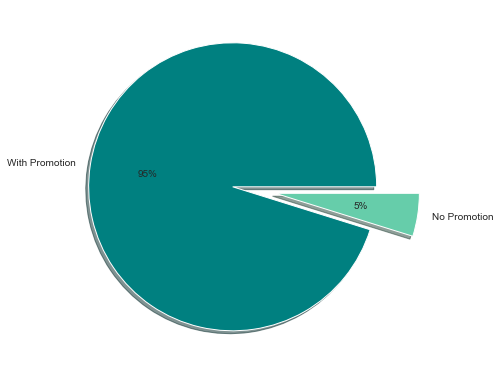

In [56]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['With Promotion', 'No Promotion']
rate = [promo_percent.values[0], promo_percent.values[1]]
colors = ['teal', 'mediumaquamarine']
explode = (0, 0.3) 
ax.pie(rate, labels=labels, autopct='%1.0f%%', shadow=True, explode=explode, colors=colors)
plt.show()

We have 95% of customers with promotion and only 5 without. This shows a very low variability between the categories, meaning that it will be difficult to identify different patterns between the customers. 

**Is lead**

This feature indicates if a customer had a longer customer journey and more touchpoints compared to the direct entry. We can see that customers who were leads before subscribing, tend to cancel less. This could be due to the fact that they are more familiar with a product and through more interactions they make their decision better, rather than just signing up for a trial month. 

This could be an indicator that lead nurturing is being done well and bringing positive results.

**Registration month**

Registration month could be an important indicator to identify if the customer is going to churn. Usually, in November, you could see more sales and higher rates of churn due to Black Friday. Since our data is encrypted we can't indicate which month is November, but it seems that there is no big difference in churn in any month. Only the month 'k' has an equal number of churned and not churned customers (compared to the overall average), meaning that more customers tend to stay longer if subscribed during this month. 

### Main insights from categorical features

- After investigating categorical data we can see that features as sex, master channel, newsletter, use pick-up point, and is lead could have the biggest impact on churn. 
- It's worth mentioning that data has very low variability (95% of the customers entering with the promotion), which might make it difficult to find different patterns of customers who churn and who don't.

## Numerical data analysis

We have six numerical features and we will visualize these features with respect to our target variable to get a better understanding of what impact they have.

We will start our analysis by checking the main metrics of our numerical features:

In [28]:
data.describe()

,registration_payment,days_from_first_click,age,box_satisfaction,random,income_per_region,population_per_region
count,26799.000000,26799.000000,26799.000000,26799.000000,26799.000000,26799.000000,2.679900e+04
mean,10.875681,2.337149,17.899213,160.381525,502.493078,14984.270458,5.242118e+06
std,3.336361,12.279991,5.582524,10.769746,288.663048,2766.314907,2.776530e+06
min,0.000000,0.000000,9.000000,133.220000,1.000000,11310.000000,3.167980e+05
25%,10.990000,0.000000,14.000000,152.340000,251.000000,12401.000000,2.399548e+06
50%,10.990000,0.000000,17.000000,160.700000,504.000000,14638.000000,6.663394e+06
75%,10.990000,0.000000,21.000000,169.440000,751.500000,17102.000000,7.675217e+06
max,30.990000,330.500000,50.000000,179.280000,1000.000000,19195.000000,8.414240e+06


Let's visualize numerical features to see if there is any impact on churn. We will start with the pairplot, to see if there is any correlation between the variables or clear separation between churned and not churned categories.

C:\Users\krist\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\krist\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\krist\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\krist\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


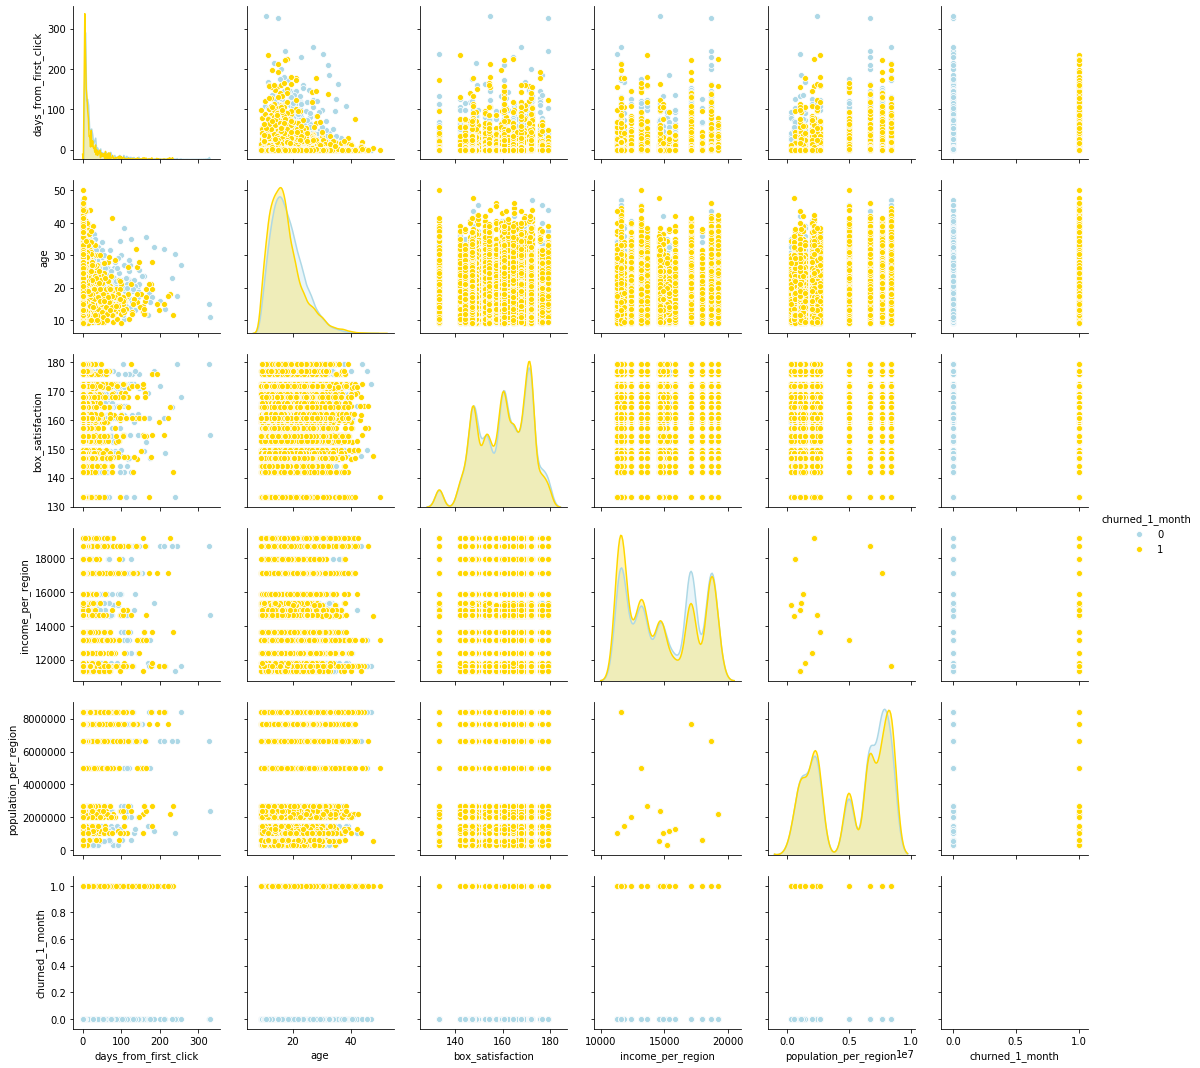

In [29]:
num_cols = data.select_dtypes(include=['float64', 'int64']).drop(['random', 'registration_payment'], 
                                                                 axis=1)

num_cols['churned_1_month'] = data['churned_1_month']
sns.pairplot(num_cols, hue='churned_1_month', palette={1: "Gold", 0: "Lightblue"})
plt.show()

It seems that there is no correlation between the numerical features. Let's see the distributions of the numerical features one by one (we will leave registration payment apart to investigate separately):

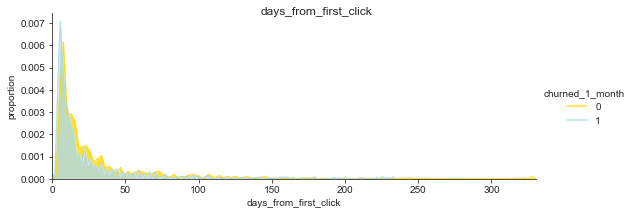

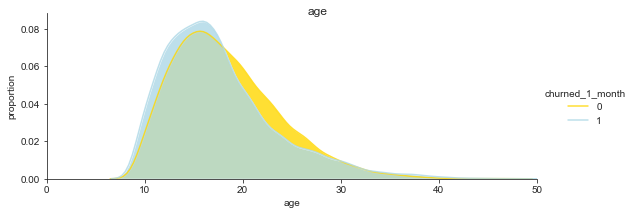

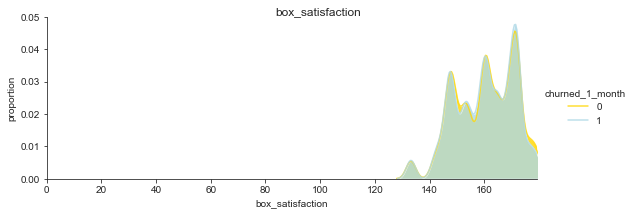

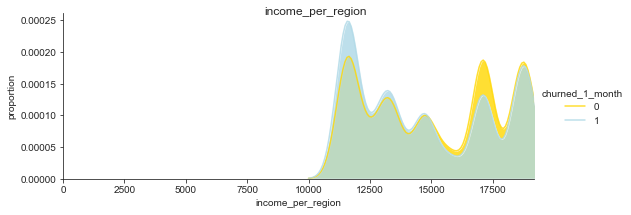

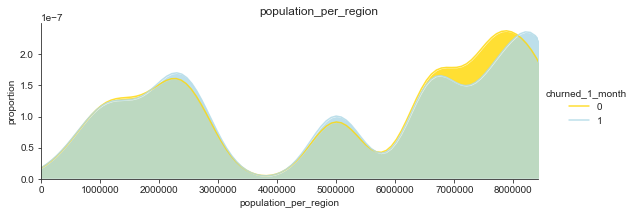

In [30]:
for col in num_cols.drop(['churned_1_month'], axis=1):
    plot_distribution_num(col)

**Days from the first click**

We can see that the majority of customers are subscribing just after the first click, there is no big time difference from the first interaction to the subscription. There is no big separation between the groups of churn.

**Age**

It seems that we have slightly more cancellations from the customer group whose age is between 20-30 (note: remember that these values are not reflecting the real business demographics). 

**Population per province**

It seems that we have slightly more cancellations from the provinces in which population is between 7M and 8M.

**Registration Payment**

The company had different pricing strategies during different years. The values of the registration payment were grouped to reflect promotional price (10.99), full price (20.99), and higher than full price (30.99) (when a customer is paying for more than one box in advance). This was done in order to be able to use the entry price through different years. Prices 0.0 and 2.99 are special prices, reflecting special segments of customers (different entry channels). Due to confidentiality reasons, more details can't be enclosed.

Let's see the price distribution more in detail:

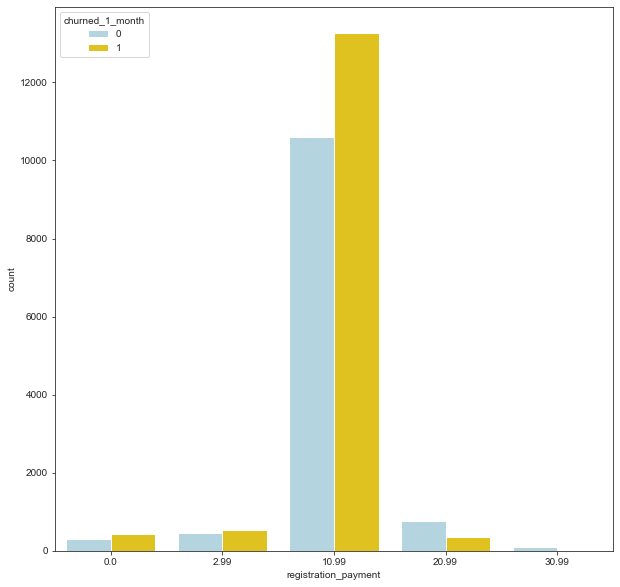

In [31]:
ax = sns.countplot(x="registration_payment", hue='churned_1_month', data=data, 
                   palette={1: "Gold", 0: "Lightblue"})

We can have the same conclusion as from the feature with_promotion, the majority of the customers are entering with a promotional price. There is no big separation between the categories (churned or not churned) in any of the prices. The only insight we can take from this is that the customers who enter with the full price (20.99) tend to cancel less. 

**Let's check the boxplots of the numerical features to see if we should be worried about the outliers**

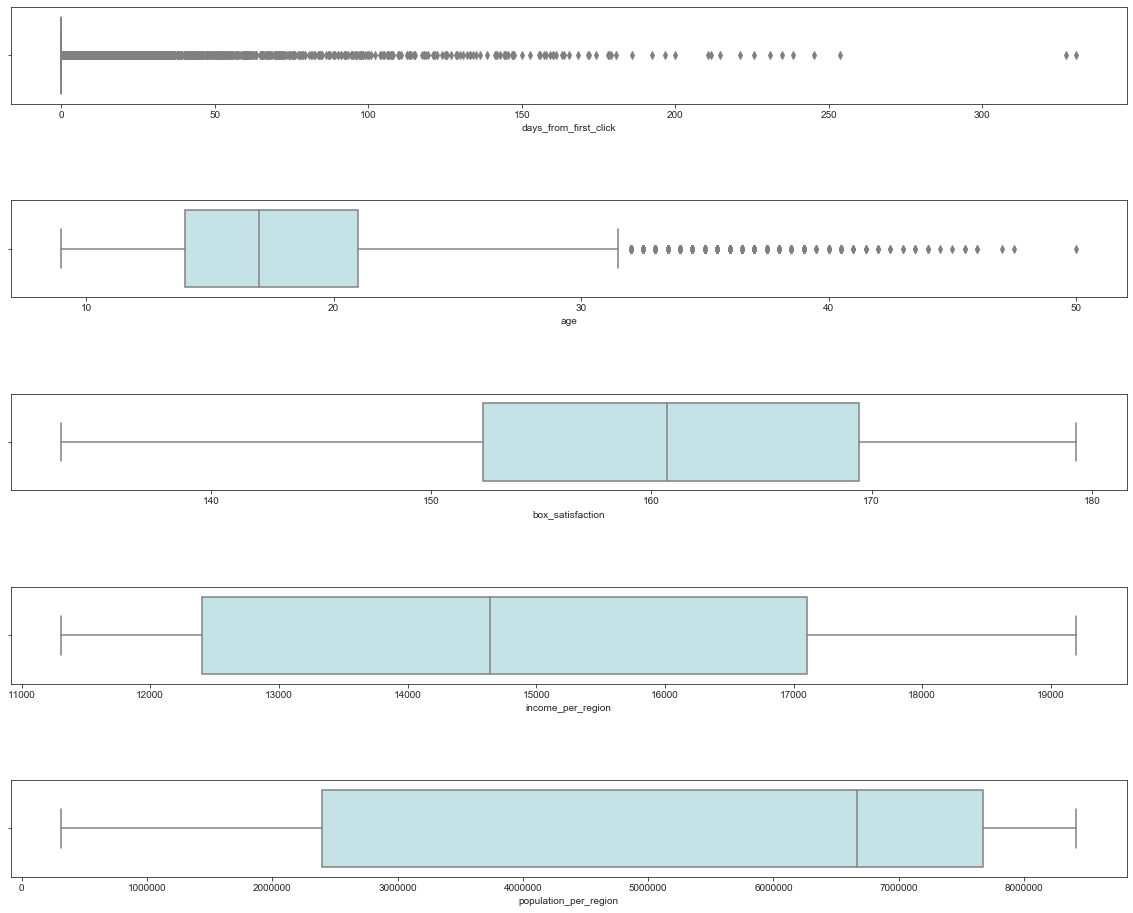

In [32]:
num_cols = data.select_dtypes(include=['float64', 'int64']).drop(['random', 'registration_payment'], 
                                                                 axis=1)

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(20,16))
fig.subplots_adjust(hspace=1)
for ax, col in zip(axes.flatten(), num_cols):
    sns.boxplot(data[col], orient='h', ax=ax, color='#BFE6ED')

Days from the first click seem to have a lot of outliers since the majority of the registrations are happening just after the first click. There are a couple of outliers in the age feature. We will see later on how we will deal with them.  

**Main insights after investigating numerical data**

- After investigating numerical data we are even more convinced that data has very low variability.
- There is no strong feature that would be indicating a clear separation between the churned and not churned customers.

## Feature selection by years

We need to make sure that we have all the features existing in all the years of the analysis. Only like this, we will be able to use our historical data to predict the future.

We will be checking master channels because it might be that the company opened new channels through the years.

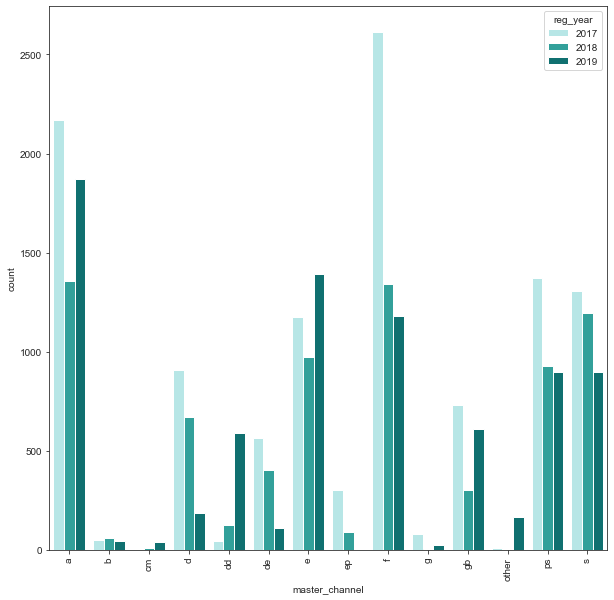

In [33]:
ax = sns.countplot(data=data, x='master_channel', hue='reg_year', 
                   palette={2017: "Paleturquoise", 2018: "Lightseagreen", 2019: "Teal"})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

It seems that some smaller channels are not appearing in all years. We will take a look only at the small ones to have a better idea:

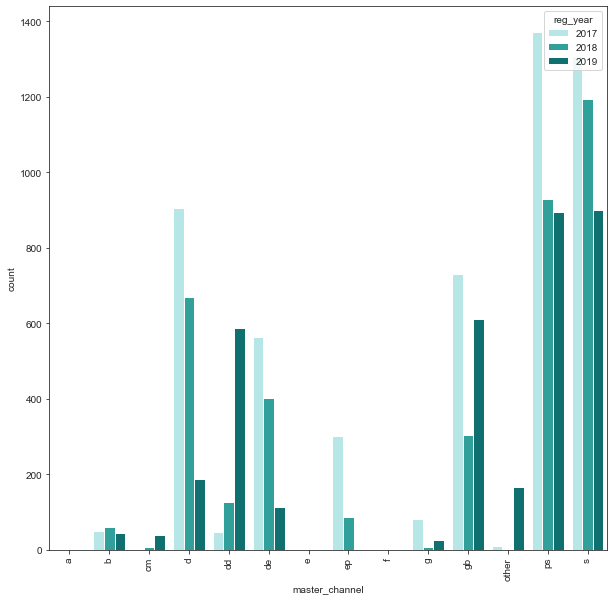

In [34]:
big_chan = ['a', 'f', 'e']
data_small_chan = data.loc[data.master_channel.apply(lambda x: x not in big_chan)]

ax = sns.countplot(data=data_small_chan, x='master_channel', hue='reg_year', 
                   palette={2017: "Paleturquoise", 2018: "Lightseagreen", 2019: "Teal"})
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

We can now clearly see that channel 'cm' was not present in 2017, channel 'ep' doesn't have values in 2019, and channel 'other' doesn't have values in 2018. We will be deleting these rows to have the data ready for modeling. 

In [35]:
channels_to_drop = ['cm', 'ep', 'other']
data.drop(data[(data['master_channel'].isin(channels_to_drop))].index, inplace=True)

In [36]:
data.shape

(26184, 17)

# Exporting clean dataset

We did only one change after the initial cleaning (deleted the master channels that were not present in all years). We will export this dataset to be able to use it in the next steps.   

*To export the dataset, please uncomment it.* 

In [37]:
# data.to_csv("../data/clean_data.csv", index=True)